In [9]:
import snappy
import ast
import csv
import pickle
import random
import time 
from ast import literal_eval
from itertools import product

In [75]:
def marker(pd2,i):
    '''
    input: pd code and a crossing in it
    output: the pd code with an unknot around the crossing
    '''
    pd=pd2.copy()
    for k in range(len(pd)):
        pd[k]=list(pd[k])
    n=max([max(k) for k in pd])
    new_pd=[]
    [a,b,c,d]=pd[i].copy()
    pd.remove(pd[i])
    if b==0:
        if d==1:
            for t in pd:
                new_t=[]
                for k in t:
                    if d<=k<=a:
                        k=k+2
                    elif c<=k<=n:
                        k=k+4
                    new_t.append(k)
                new_pd.append(new_t)
            new_pd.append([a+2,n+5,a+3,n+8])
            new_pd.append([0,n+6,1,n+5])
            new_pd.append([2,n+7,3,n+8]) # or maybe just c?
            new_pd.append([a+4,n+6,c+4,n+7])
            new_pd.append([a+3,1,a+4,2])
            return(new_pd)
        else:
            for t in pd:
                new_t=[]
                for k in t:
                    if c<=k:
                        k=k+2
                    new_t.append(k)
                new_pd.append(new_t)
            new_pd.append([a,n+5,a+1,n+8])
            new_pd.append([n+4,n+5,0,n+6])
            new_pd.append([a+2,n+6,c+2,n+7]) # or maybe just c?
            new_pd.append([n+2,n+8,n+3,n+7])
            new_pd.append([a+1,n+4,a+2,n+3])
            return(new_pd)
        
    if c==0:
        if d>b:
            for t in pd:
                new_t=[]
                for k in t:
                    if d<=k:
                        k=k+2
                    new_t.append(k)
                new_pd.append(new_t)
            new_pd.append([n+2,n+5,n+3,n+8])
            new_pd.append([n+4,n+6,0,n+7])
            new_pd.append([b+2,n+7,d+2,n+8]) # or maybe just c?
            new_pd.append([b,n+6,b+1,n+5])
            new_pd.append([n+3,b+1,n+4,b+2])
            return(new_pd)
        else:
            for t in pd:
                new_t=[]
                for k in t:
                    if b<=k:
                        k=k+2
                    new_t.append(k)
                new_pd.append(new_t)
            new_pd.append([n+2,n+5,n+3,n+8])
            new_pd.append([n+4,n+6,0,n+7])
            new_pd.append([d+2,n+5,b+2,n+6]) # or maybe just c?
            new_pd.append([d,n+8,d+1,n+7])
            new_pd.append([n+3,d+2,n+4,d+1])
            return(new_pd)
        
    if d==0:
        if b==1:
            for t in pd:
                new_t=[]
                for k in t:
                    if b<=k<=a:
                        k=k+2
                    elif c<=k<=n:
                        k=k+4
                    new_t.append(k)
                new_pd.append(new_t)
            new_pd.append([a+2,n+5,a+3,n+8])
            new_pd.append([2,n+5,3,n+6])
            new_pd.append([a+4,n+6,c+4,n+7]) # or maybe just c?
            new_pd.append([0,n+8,1,n+7])
            new_pd.append([a+3,2,a+4,1])
            return(new_pd)
        else:
            for t in pd:
                new_t=[]
                for k in t:
                    if c<=k:
                        k=k+2
                    new_t.append(k)
                new_pd.append(new_t)
            new_pd.append([a,n+5,a+1,n+8])
            new_pd.append([n+2,n+6,n+3,n+5])
            new_pd.append([a+2,n+6,c+2,n+7]) # or maybe just c?
            new_pd.append([n+4,n+7,0,n+8])
            new_pd.append([a+1,n+3,a+2,n+4])
            return(new_pd)
    if b<d or d==0: # b points to d in the orientation
        if a<b: # the second strand comes after the a,c strand in the numbering
            for t in pd:
                new_t=[]
                for k in t:
                    if c<=k<=b:
                        k=k+2
                    elif d<=k<=n:
                        k=k+4
                    new_t.append(k)
                new_pd.append(new_t)
            new_pd.append([a,n+5,a+1,n+8])
            new_pd.append([b+2,n+6,b+3,n+5])
            new_pd.append([a+2,n+6,c+2,n+7]) # or maybe just c?
            new_pd.append([b+4,n+7,d+4,n+8])
            new_pd.append([a+1,b+3,a+2,b+4])
            
        if b<a:
            for t in pd:
                new_t=[]
                for k in t:
                    if d<=k<=a:
                        k=k+2
                    elif c<=k<=n:
                        k=k+4
                    new_t.append(k)
                new_pd.append(new_t)
            new_pd.append([a+2,n+5,a+3,n+8])
            new_pd.append([b,n+6,b+1,n+5])
            new_pd.append([b+2,n+7,d+2,n+8]) # or maybe just c?
            new_pd.append([a+4,n+6,c+4,n+7])
            new_pd.append([a+3,b+1,a+4,b+2])
    else: # d points to b
        if c<d:
            for t in pd:
                new_t=[]
                for k in t:
                    if c<=k<=d:
                        k=k+2
                    elif b<=k<=n:
                        k=k+4
                    new_t.append(k)
                new_pd.append(new_t)
            new_pd.append([a,n+5,a+1,n+8])
            new_pd.append([d+4,n+5,b+4,n+6])
            new_pd.append([a+2,n+6,c+2,n+7]) # or maybe just c?
            new_pd.append([d+2,n+8,d+3,n+7])
            new_pd.append([a+1,d+4,a+2,d+3])
           
        if c>d:
            for t in pd:
                new_t=[]
                for k in t:
                    if b<=k<=a:
                        k=k+2
                    elif c<=k<=n:
                        k=k+4
                    new_t.append(k)
                new_pd.append(new_t)
            new_pd.append([a+2,n+5,a+3,n+8])
            new_pd.append([d+2,n+5,b+2,n+6])
            new_pd.append([a+4,n+6,c+4,n+7]) # or maybe just c?
            new_pd.append([d,n+8,d+1,n+7])
            new_pd.append([a+3,d+2,a+4,d+1])   
    return(new_pd)
def cc(pd2,i):
    '''
    changes the ith crossing
    '''
    pd=pd2.copy()
    if pos_crossing(pd,i):
        [a,b,c,d]=pd[i]
        pd[i]=[d,a,b,c]
    else:
        [a,b,c,d]=pd[i]
        pd[i]=[b,c,d,a]
    return(pd)

def pos_crossing(pd,i):
    '''
    True if the i-th crossing is positive, False else
    '''
    n=max([max(k) for k in pd])
    print(n)
    (a,b,c,d)=pd[i]
    if d==n:
        if b==0:
            return(True)
    if b==n:
        if d==0:
            return(False)
    if d<b:
        return(True)
    return(False)

In [167]:
[(g1,g2),pds]=[(8, 7),[[[(15, 24, 16, 25),
    (71, 26, 72, 27),
    (52, 25, 53, 26),
    (4, 23, 5, 24),
    (50, 0, 51, 97),
    (86, 21, 87, 22),
    (68, 2, 69, 1),
    (70, 52, 71, 51),
    (69, 83, 70, 82),
    (49, 81, 50, 80),
    (34, 73, 35, 74),
    (3, 85, 4, 84),
    (14, 84, 15, 83),
    (13, 3, 14, 2),
    (6, 20, 7, 19),
    (35, 18, 36, 19),
    (85, 39, 86, 38),
    (20, 87, 21, 88),
    (22, 37, 23, 38),
    (42, 94, 43, 93),
    (88, 8, 89, 7),
    (90, 31, 91, 32),
    (36, 5, 37, 6),
    (41, 30, 42, 31),
    (40, 10, 41, 9),
    (95, 45, 96, 44),
    (91, 59, 92, 58),
    (43, 61, 44, 60),
    (27, 96, 28, 97),
    (89, 75, 90, 74),
    (29, 62, 30, 63),
    (57, 32, 58, 33),
    (28, 45, 29, 46),
    (33, 56, 34, 57),
    (64, 48, 65, 47),
    (16, 54, 17, 53),
    (55, 73, 56, 72),
    (59, 93, 60, 92),
    (94, 62, 95, 61),
    (78, 64, 79, 63),
    (11, 67, 12, 66),
    (48, 66, 49, 65),
    (54, 18, 55, 17),
    (39, 77, 40, 76),
    (8, 76, 9, 75),
    (77, 11, 78, 10),
    (67, 13, 68, 12),
    (79, 47, 80, 46),
    (81, 1, 82, 0)],
   [(14, 15), 'cc+-']],
  [[(20, 4, 21, 3),
    (19, 11, 20, 10),
    (21, 29, 22, 28),
    (11, 31, 12, 30),
    (4, 30, 5, 29),
    (12, 8, 13, 7),
    (31, 9, 32, 8),
    (33, 15, 0, 14),
    (32, 26, 33, 25),
    (13, 25, 14, 24),
    (16, 2, 17, 1),
    (2, 18, 3, 17),
    (26, 16, 27, 15),
    (9, 19, 10, 18),
    (5, 23, 6, 22),
    (23, 7, 24, 6),
    (27, 1, 28, 0)],
   [0, 'cc']],
  [[(18, 10, 19, 9),
    (14, 26, 15, 25),
    (5, 25, 6, 24),
    (2, 22, 3, 21),
    (15, 7, 16, 6),
    (27, 9, 0, 8),
    (26, 18, 27, 17),
    (11, 21, 12, 20),
    (10, 2, 11, 1),
    (4, 14, 5, 13),
    (23, 13, 24, 12),
    (7, 17, 8, 16),
    (22, 4, 23, 3),
    (19, 1, 20, 0)],
   [[0, 'cc'], [0, 'cc']]]]]

In [168]:
len(pds)

3

In [203]:
[pd1,change1]=pds[0]
[pd2,change2]=pds[1]
[pd3,change3]=pds[2]

In [170]:
[change1,change2,change3]

[[(14, 15), 'cc+-'], [0, 'cc'], [[0, 'cc'], [0, 'cc']]]

In [171]:
len(pd1),len(pd2),len(pd3)

(49, 17, 14)

In [225]:
pd=[(72,95,73,96),(96,71,97,72),(67,84,68,85),(80,69,81,70),(91,64,92,65),(61,76,62,77),(93,57,94,56),(57,75,58,74),(55,93,56,92),(54,63,55,64),(79,49,80,48),(75,44,76,45),(58,45,59,46),(43,62,44,63),(52,42,53,41),(89,39,90,38),(66,37,67,38),(36,84,37,83),(81,35,82,34),(32,98,33,97),(31,70,32,71),(59,28,60,29),(29,47,30,46),(88,22,89,21),(26,78,27,77),(27,60,28,61),(53,25,54,24),(42,26,43,25),(22,40,23,39),(20,86,21,85),(78,18,79,17),(18,50,19,49),(47,17,48,16),(30,16,31,15),(94,14,95,13),(73,14,74,15),(11,91,12,90),(12,65,13,66),(9,41,10,40),(10,24,11,23),(8,52,9,51),(50,8,51,7),(87,7,88,6),(5,87,6,86),(68,3,69,4),(35,3,36,2),(19,5,20,4),(82,2,83,1),(98,34,1,33)]
    

[[21, 13, 22, 12], [25, 33, 26, 32], [13, 35, 14, 34], [6, 34, 7, 33], [14, 10, 15, 9], [35, 11, 36, 10], [37, 17, 0, 16], [36, 30, 37, 29], [15, 29, 16, 28], [18, 2, 19, 1], [2, 20, 3, 19], [30, 18, 31, 17], [11, 21, 12, 20], [7, 27, 8, 26], [27, 9, 28, 8], [31, 1, 32, 0], [22, 38, 23, 41], [5, 38, 6, 39], [24, 39, 25, 40], [3, 41, 4, 40], [23, 5, 24, 4]]


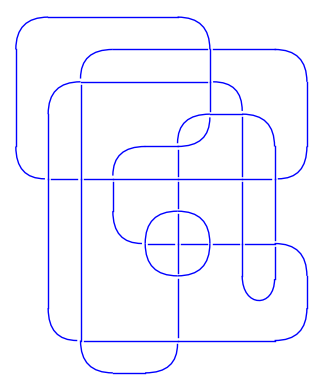

In [237]:
L=snappy.Link(marker(pd2,0))
print(marker(pd2,0))
L.sage_link().plot()

[[16, 30, 17, 29], [5, 29, 6, 28], [2, 26, 3, 25], [17, 7, 18, 6], [31, 9, 0, 8], [30, 20, 31, 19], [13, 25, 14, 24], [12, 2, 13, 1], [4, 16, 5, 15], [27, 15, 28, 14], [7, 19, 8, 18], [26, 4, 27, 3], [23, 1, 24, 0], [20, 32, 21, 35], [11, 32, 12, 33], [22, 33, 23, 34], [9, 35, 10, 34], [21, 11, 22, 10]]


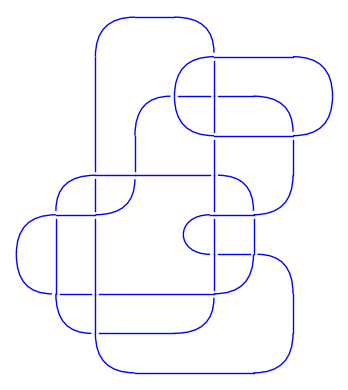

In [235]:
L=snappy.Link(marker(pd3,0))
print(marker(pd3,0))
L.sage_link().plot()

In [240]:
pd= [(4,8,5,7),(26,12,1,11),(13,3,14,2),(5,17,6,16),(15,7,16,6),(10,18,11,17),(19,13,20,12),(20,2,21,1),(3,23,4,22),(14,22,15,21),(23,9,24,8),(9,25,10,24),(25,19,26,18)]


In [241]:
snappy.Link(pd).exterior().identify()

[m016(0,0), K3_1(0,0), K12n242(0,0)]

In [246]:
print(snappy.Link(pd1).DT_code())

[(82, 14, -24, -20, -76, 78, 68, -84, -54, 36, -88, -38, 16, 72, -46, 42, 58, -74, -6, 86, -10, -94, 96, 80, -66, -98, -26, -18, 34, 92, 44, 30, -48, 12, -2, -52, 56, 90, 40, -64, 50, 70, 4, -22, -8, -32, 60, -62, 28)]


In [250]:
snappy.Link(pd1).DT_code()

[(82,
  14,
  -24,
  -20,
  -76,
  78,
  68,
  -84,
  -54,
  36,
  -88,
  -38,
  16,
  72,
  -46,
  42,
  58,
  -74,
  -6,
  86,
  -10,
  -94,
  96,
  80,
  -66,
  -98,
  -26,
  -18,
  34,
  92,
  44,
  30,
  -48,
  12,
  -2,
  -52,
  56,
  90,
  40,
  -64,
  50,
  70,
  4,
  -22,
  -8,
  -32,
  60,
  -62,
  28)]

In [ ]:
82, 14, -24, -20, -76, 78, 68, -84, -54, 36, -88, -38, 16, 72, -46, 42, 58, -74, -6, 86, -10, -94, 96, 80, -66, -98, -26, -18, 34, 92, 44, 30, -48, 12, -2, -52, 56, 90, 40, -64, 50, 70, 4, -22, -8, -32, 60, -62, 28

In [251]:
print(pd_codes[50][1])

NameError: name 'pd_codes' is not defined

In [253]:
L=snappy.Link(pd1)
L.exterior().identify()

[o9_08268(0,0), K9_112(0,0)]

In [254]:
L=snappy.Link(pd1)
L.knot_floer_homology()

{'L_space_knot': False,
 'epsilon': 1,
 'fibered': True,
 'modulus': 2,
 'nu': 8,
 'ranks': {(-15, -28): 1,
  (-14, -27): 2,
  (-13, -26): 1,
  (-11, -20): 1,
  (-10, -19): 2,
  (-9, -18): 1,
  (-8, -16): 1,
  (-7, -15): 1,
  (-7, -14): 1,
  (-6, -13): 2,
  (-5, -12): 1,
  (-4, -10): 1,
  (-3, -9): 1,
  (-3, -8): 1,
  (-2, -7): 1,
  (-1, -7): 1,
  (-1, -6): 1,
  (0, -6): 1,
  (1, -5): 1,
  (1, -4): 1,
  (2, -3): 1,
  (3, -3): 1,
  (3, -2): 1,
  (4, -2): 1,
  (5, -2): 1,
  (6, -1): 2,
  (7, -1): 1,
  (7, 0): 1,
  (8, 0): 1,
  (9, 0): 1,
  (10, 1): 2,
  (11, 2): 1,
  (13, 0): 1,
  (14, 1): 2,
  (15, 2): 1},
 'seifert_genus': 15,
 'tau': 8,
 'total_rank': 41}

In [255]:
L.signature()

-10

In [256]:
len(pd1)

49